
[![AnalyticsDojo](https://github.com/rpi-techfundamentals/spring2019-materials/blob/master/fig/final-logo.png?raw=1)](http://rpi.analyticsdojo.com)
<center><h1>MA, AR, and Arma </h1></center>
<center><h3><a href = 'http://introml.analyticsdojo.com'>introml.analyticsdojo.com</a></h3></center>


# Out of Sample Prediction

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 5
import seaborn as sns
#!pip -q install yfinance
import yfinance as yf

<AxesSubplot:title={'center':'Test'}, xlabel='Date'>

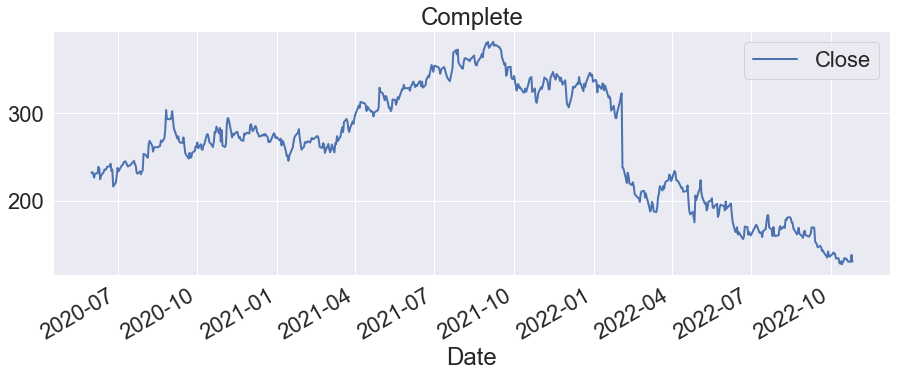

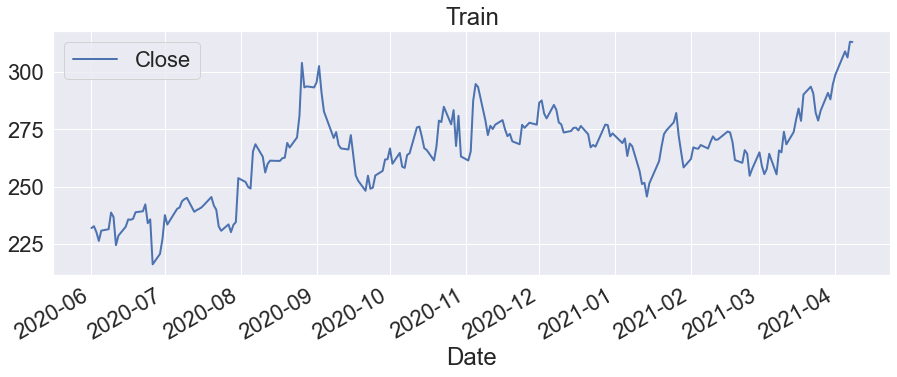

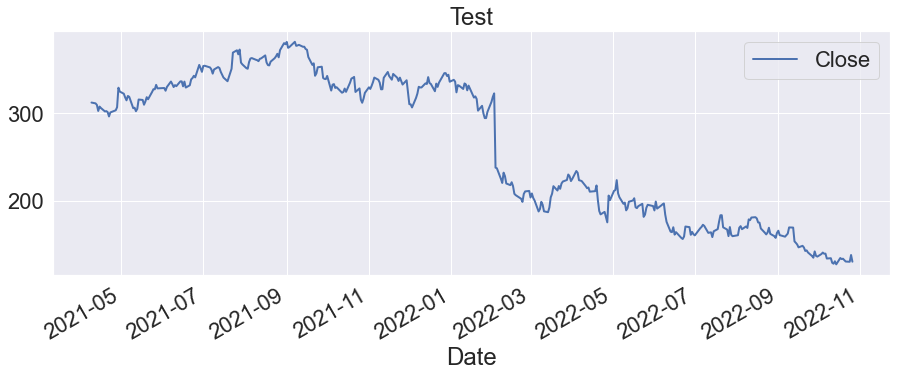

In [2]:
sns.set(font_scale=2)
FB = yf.Ticker("META")
FB_values = FB.history(start="2020-06-01")
train_values=FB_values[:len(FB_values)-1000]
test_values=FB_values[len(FB_values)-1000:]


FB_values[['Close']].plot(lw=2,title='Complete')
train_values[['Close']].plot(lw=2,title='Train')
test_values[['Close']].plot(lw=2,title='Test')

In [3]:
from statsmodels.tsa.arima.model import ARIMA
ARMA_model = ARIMA(endog=train_values['Close'], order=(10, 0, 10))
results = ARMA_model.fit()
print(results.summary())

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. U

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  216
Model:               ARIMA(10, 0, 10)   Log Likelihood                -681.035
Date:                Wed, 26 Oct 2022   AIC                           1406.071
Time:                        20:01:06   BIC                           1480.327
Sample:                             0   HQIC                          1436.071
                                - 216                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        264.4526     28.232      9.367      0.000     209.118     319.787
ar.L1          0.5871      1.666      0.352      0.724      -2.678       3.852
ar.L2          0.8793      0.858      1.024      0.3

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [4]:
# evaluate an ARIMA model using a walk-forward validation
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt
# load dataset

FB_values = FB.history(start="2020-06-01")
train_values=FB_values[:len(FB_values)-1000]
test_values=FB_values[len(FB_values)-1000:]


test_values=test_values['Close']
train_values=train_values['Close']
history = [x for x in train_values]

history
# split into train and test sets
predictions = list()

# walk-forward validation
for t in range(len(test_values)):
    model = ARIMA(history, order=(1,0,1))
    model_fit = model.fit()
    output = model_fit.forecast(steps=1)
    yhat = output[0]
    predictions.append(yhat)
    obs = test_values[t]
    history.append(obs)
    #print('predicted=%f, expected=%f' % (yhat, obs))
# evaluate forecasts
rmse = sqrt(mean_squared_error(test_values, predictions))
print('Test RMSE: %.3f' % rmse)

<ipython-input-4-f5b348368ee8>:3: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


Test RMSE: 7.590


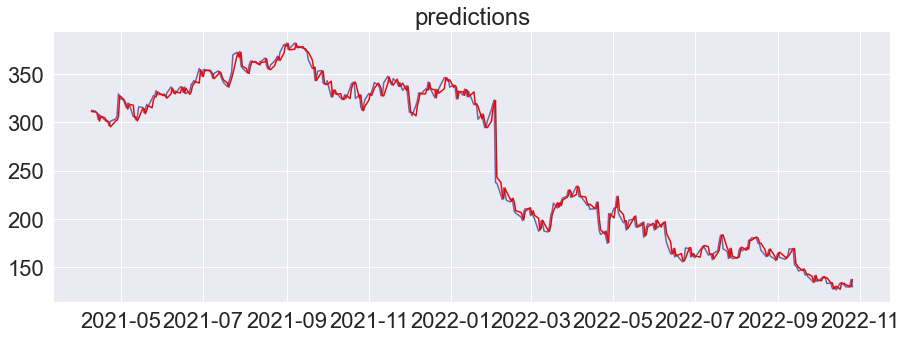

In [5]:
# plot forecasts against actual outcomes
predictions=pd.DataFrame(predictions)
test_values=pd.DataFrame(test_values)
predictions.index=test_values.index
pyplot.plot(test_values)
plt.title("predictions")
pyplot.plot(predictions, color='red')
pyplot.show()
